## **Problem Statement**: "Analyzing the Impact of Payment Card Issuers on Ridership and Revenue"

**Background**
Transjakarta, a public transportation company based in Jakarta, uses payment cards as tickets for passengers. These payment cards may be issued by various banks or financial institutions. The objective is to investigate whether the choice of payment card issuer influences ridership patterns and revenue generation for Transjakarta.

1. transID: Unique transaction id for every transaction
2. payCardID: Customers main identifier. The card customers use as a ticket for entrance and exit.
3. payCardBank: Customers card bank issuer name
4. payCardName: Customers name that is embedded in the card.
5. payCardSex: Customers sex that is embedded in the card
6. payCardBirthDate: Customers birth year
7. corridorID: Corridor ID / Route ID as key for route grouping.
8. corridorName: Corridor Name / Route Name contains Start and Finish for each route.
9. direction: 0 for Go, 1 for Back. Direction of the route.
10. tapInStops: Tap In (entrance) Stops ID for identifying stops name
11. tapInStopsName: Tap In (entrance) Stops Name where customers tap in.
12. tapInStopsLat: Latitude of Tap In Stops
13. tapInStopsLon: Longitude of Tap In Stops
14. stopStartSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
15. tapInTime: Time of tap in. Date and time
16. tapOutStops: Tap Out (Exit) Stops ID for identifying stops name
17. tapOutStopsName: Tap out (exit) Stops Name where customers tap out.
18. tapOutStopsLat: Latitude of Tap Out Stops
19. tapOutStopsLon: Longitude of Tap Out Stops
20. stopEndSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
21. tapOutTime: Time of tap out. Date and time
22. payAmount: The number of what customers pay. Some are free. Some not.

In [1]:
# import library 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

## **Load Dataset**

In [2]:
df = pd.read_csv('Transjakarta.csv')
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [4]:
# check for missing values
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [5]:
# check fuplicat values
df.duplicated().sum()

0

**1. Identifying Important Columns**: 

- Critical columns: transID, payCardID, payCardBank, payCardName, payCardSex, payCardBirthDate, direction, tapInStopsName, tapInStopsLat, tapInStopsLon, stopStartSeq, tapInTime, payAmount.

- Less critical columns: corridorID, corridorName, tapInStops, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime.

**2. Handling Missing Values**: 
- Critical columns:
    - **corridorID**, **corridorName**: These columns have a moderate number of missing values. We can impute missing values using the mode (most frequent value) for categorical data.  
    - **payAmount**: Since this column is essential for analysis and missing values are not extensive, we can impute missing values with the mean or median value.

- Less critical columns:
tapInStops, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime: These columns have a relatively high number of missing values

**3. Cleaning the Data**

In [6]:
# Impute missing values in critical columns
df['corridorID'].fillna(df['corridorID'].mode()[0], inplace=True)
df['corridorName'].fillna(df['corridorName'].mode()[0], inplace=True)
df['payAmount'].fillna(df['payAmount'].median(), inplace=True)

# Drop less critical columns with a high number of missing values
drop_columns = ['tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime']
df.drop(columns=drop_columns, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        37900 non-null  object 
 7   corridorName      37900 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStopsName    37900 non-null  object 
 10  tapInStopsLat     37900 non-null  float64
 11  tapInStopsLon     37900 non-null  float64
 12  stopStartSeq      37900 non-null  int64  
 13  tapInTime         37900 non-null  object 
 14  payAmount         37900 non-null  float64
dtypes: float64(4), int64(3), object(8)
memory usage: 4.3+ MB


**4. Data Type Conversion:**
- Ensure that columns like "tapInTime" are in the correct data type

In [8]:
# Convert the date column to datetime type
df['tapInTime'] = pd.to_datetime(df['tapInTime'])

In [9]:
df.to_csv('Transjakarta_Update.csv')

## **EDA**

In [10]:
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,37900,37900.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,2023-04-16 08:05:29.462770688,2720.976253
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,2023-04-01 06:22:27,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,2023-04-10 09:02:15,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,2023-04-16 17:38:42.500000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,2023-04-22 05:12:02.500000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,2023-04-30 21:55:41,20000.000000
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,NaN,4157.880625


**1. Payment Card Issuer Distribution**

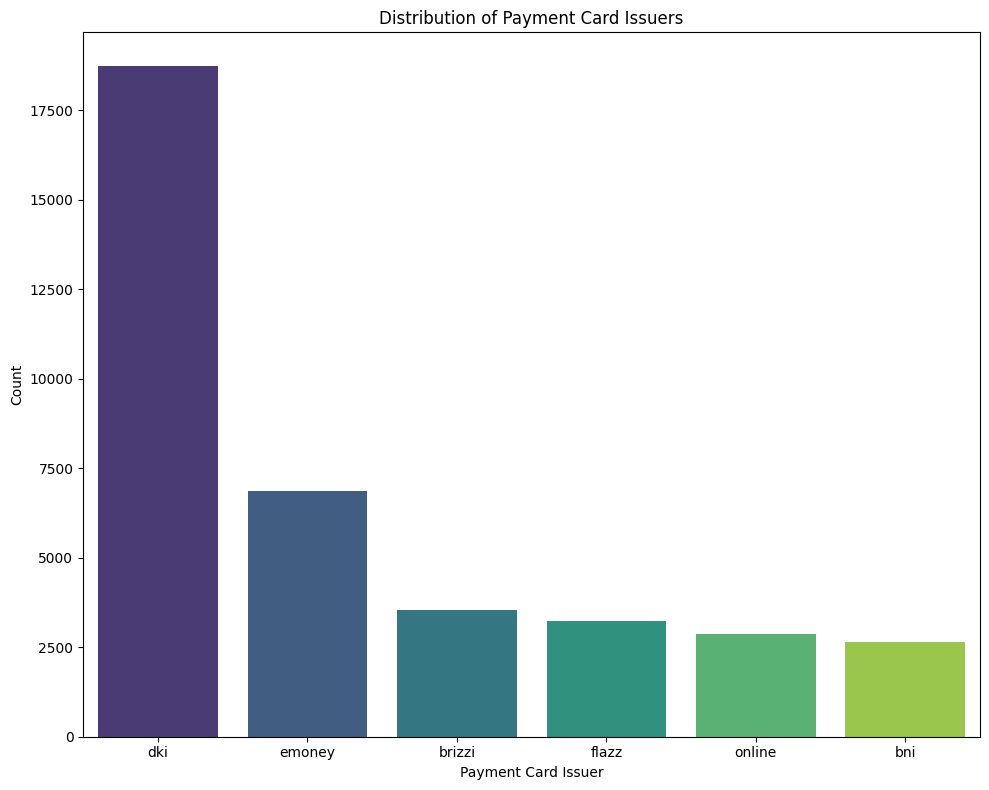

payCardBank
dki       18743
emoney     6866
brizzi     3531
flazz      3234
online     2869
bni        2657
Name: count, dtype: int64


In [11]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x=df['payCardBank'].value_counts().index, y=df['payCardBank'].value_counts().values, palette='viridis')
plt.xlabel('Payment Card Issuer')
plt.ylabel('Count')
plt.title('Distribution of Payment Card Issuers')
plt.tight_layout()
plt.show()

print(df['payCardBank'].value_counts())


**Dominant Issuers**: The "dki" card issuer appears to be the most dominant, with the highest number of transactions (18,743). This suggests that a significant portion of Transjakarta passengers prefer to use "dki" cards for their transactions.

**Variety of Issuers**: While "dki" is dominant, there is still a variety of card issuers in use, including "emoney," "brizzi," "flazz," "online," and "bni." This indicates that passengers have multiple choices when it comes to payment cards for their Transjakarta rides.

**2. average fare per ride for each card issuer**

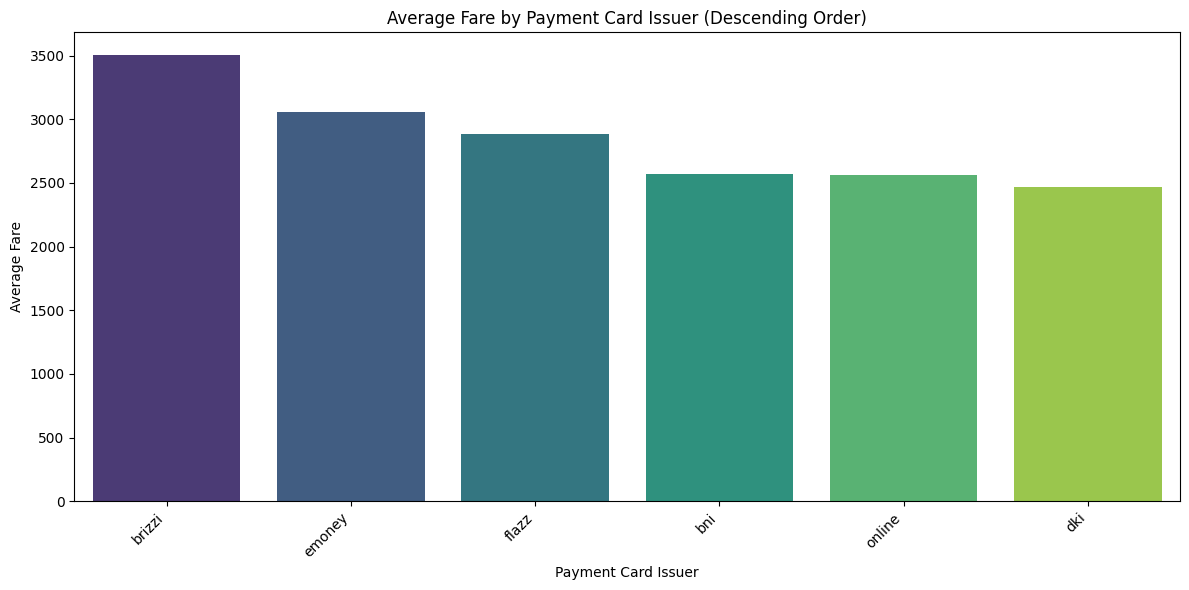

  payCardBank    payAmount
1      brizzi  3507.221750
3      emoney  3060.588407
4       flazz  2882.807669
0         bni  2568.686489
5      online  2562.739631
2         dki  2466.334098


In [12]:
# Group by card issuer and calculate the average fare
avg_fare_by_issuer = df.groupby('payCardBank')['payAmount'].mean().reset_index()

# Sort the DataFrame by 'payAmount' in descending order
avg_fare_by_issuer = avg_fare_by_issuer.sort_values(by='payAmount', ascending=False)

# Create a bar chart to visualize the average fare by issuer
plt.figure(figsize=(12, 6))
sns.barplot(x='payCardBank', y='payAmount', data=avg_fare_by_issuer, palette='viridis')
plt.xlabel('Payment Card Issuer')
plt.ylabel('Average Fare')
plt.title('Average Fare by Payment Card Issuer (Descending Order)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(avg_fare_by_issuer)


**Payment Variation**: There is variation in the average fare per ride among different card issuers. This suggests that passengers using different card issuers tend to pay different amounts for their Transjakarta rides.

**Higher Fare Issuers**: "Brizzi" users have the highest average fare per ride (approximately 3,507.22), indicating that passengers using "Brizzi" cards typically pay more for their rides compared to other issuers.

**Lower Fare Issuers**: On the other hand, "DKI" users have the lowest average fare per ride (approximately 2,466.33). Passengers using "DKI" cards tend to pay less on average for their Transjakarta rides.

**3. Total Revenue by Payment Card Issuer (Descending Order)**

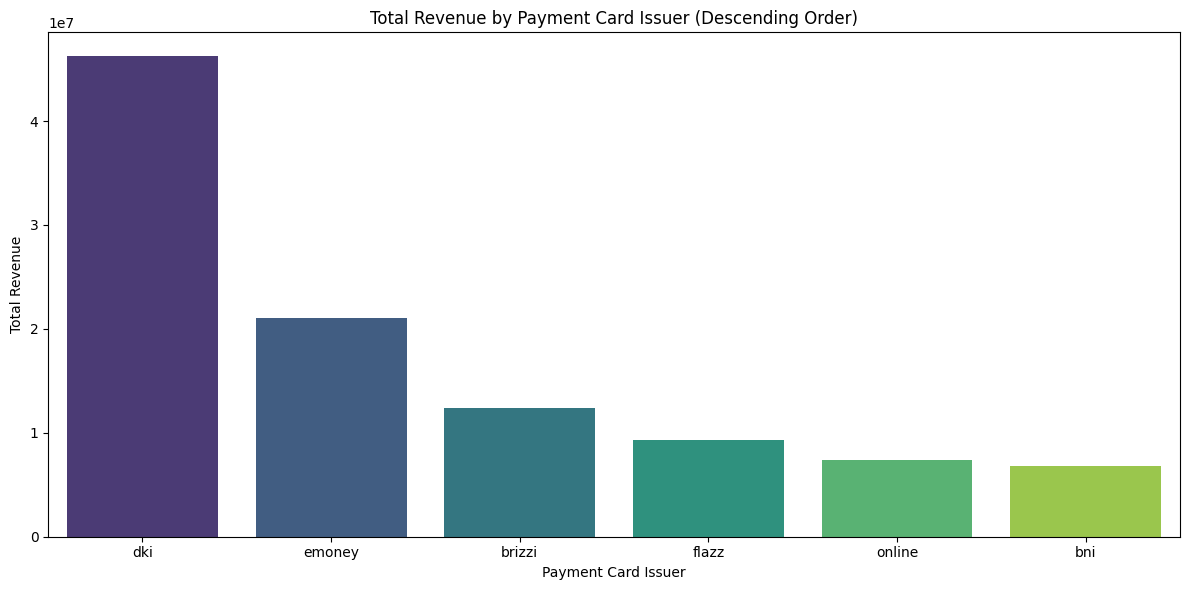

  payCardBank   payAmount
2         dki  46226500.0
3      emoney  21014000.0
1      brizzi  12384000.0
4       flazz   9323000.0
5      online   7352500.0
0         bni   6825000.0


In [13]:
# Group by card issuer and calculate total revenue
revenue_by_issuer = df.groupby('payCardBank')['payAmount'].sum().reset_index()

# Sort the DataFrame by 'payAmount' in descending order
revenue_by_issuer = revenue_by_issuer.sort_values(by='payAmount', ascending=False)

# Create a vertical bar chart to visualize total revenue by issuer
plt.figure(figsize=(12, 6))  # Adjust the figure size to fit the vertical layout
sns.barplot(x='payCardBank', y='payAmount', data=revenue_by_issuer, palette='viridis')
plt.ylabel('Total Revenue')
plt.xlabel('Payment Card Issuer')
plt.title('Total Revenue by Payment Card Issuer (Descending Order)')
plt.tight_layout()
plt.show()

print(revenue_by_issuer)


**Revenue Distribution**: The data shows the distribution of total revenue across different card issuers. "DKI" appears to be the leading issuer in terms of total revenue, followed by "Emoney," "Brizzi," "Flazz," "Online," and "BNI."

**Customer Gender Distribution**

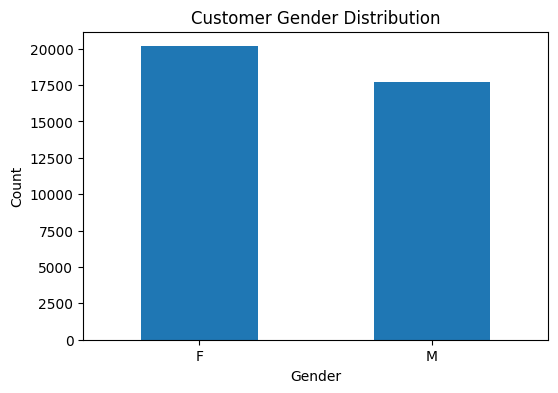

payCardSex
F    20157
M    17743
Name: count, dtype: int64


In [14]:
# Assuming you have a DataFrame 'df' with customer data
gender_counts = df['payCardSex'].value_counts()
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Customer Gender Distribution')
plt.xticks(rotation=0)
plt.show()

print(gender_counts)


**Insight**: 
- **Gender Equality**: The data shows a relatively balanced gender distribution among Transjakarta passengers using payment cards. There are 20,157 female passengers (identified as "F") and 17,743 male passengers (identified as "M"). This suggests that the public transportation system is used by individuals of both genders.


**4. Total Revenue by Demographic**

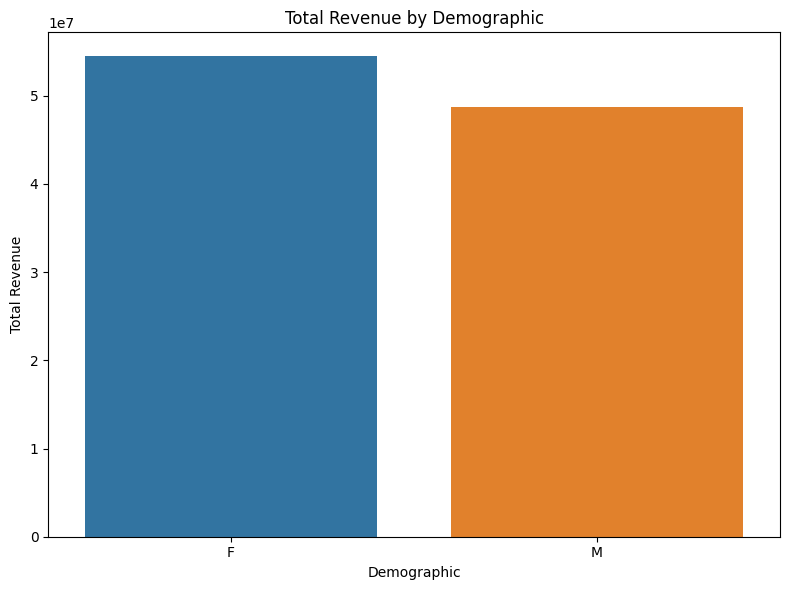

  payCardSex   payAmount
0          F  54459000.0
1          M  48666000.0


In [15]:
# Group by demographic and calculate total revenue
revenue_by_demographic = df.groupby('payCardSex')['payAmount'].sum().reset_index()

# Visualize total revenue by demographic
plt.figure(figsize=(8, 6))
sns.barplot(x='payCardSex', y='payAmount', data=revenue_by_demographic)
plt.xlabel('Demographic')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Demographic')
plt.tight_layout()
plt.show()

print(revenue_by_demographic)


In [16]:
# Calculate the IQR (Interquartile Range)
Q1 = df['payAmount'].quantile(0.25)
Q3 = df['payAmount'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# count and display the number of outliers 
outliers = df[(df['payAmount'] < lower_bound) | (df['payAmount'] > upper_bound)]
num_outliers = len(outliers)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Number of outliers:", num_outliers)

Lower Bound: -5250.0
Upper Bound: 8750.0
Number of outliers: 1742


**5. Pay Amount Distribution**

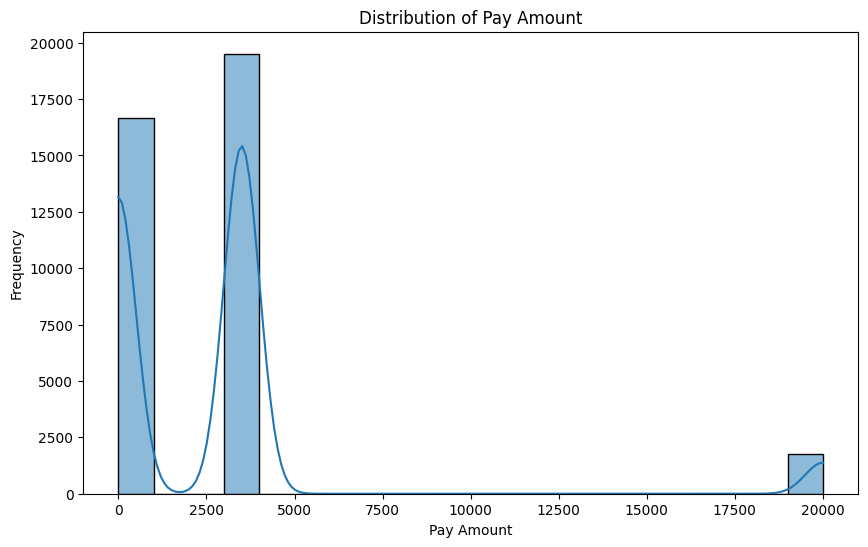

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['payAmount'], bins=20, kde=True)
plt.title('Distribution of Pay Amount')
plt.xlabel('Pay Amount')
plt.ylabel('Frequency')
plt.show()

In [18]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,3500.0


**Bank Issuer Distribution by Gender**

   payCardBank payCardSex  count
0          bni          F   1517
1          bni          M   1140
2       brizzi          F   1820
3       brizzi          M   1711
4          dki          F   9539
5          dki          M   9204
6       emoney          F   4054
7       emoney          M   2812
8        flazz          F   1828
9        flazz          M   1406
10      online          F   1399
11      online          M   1470


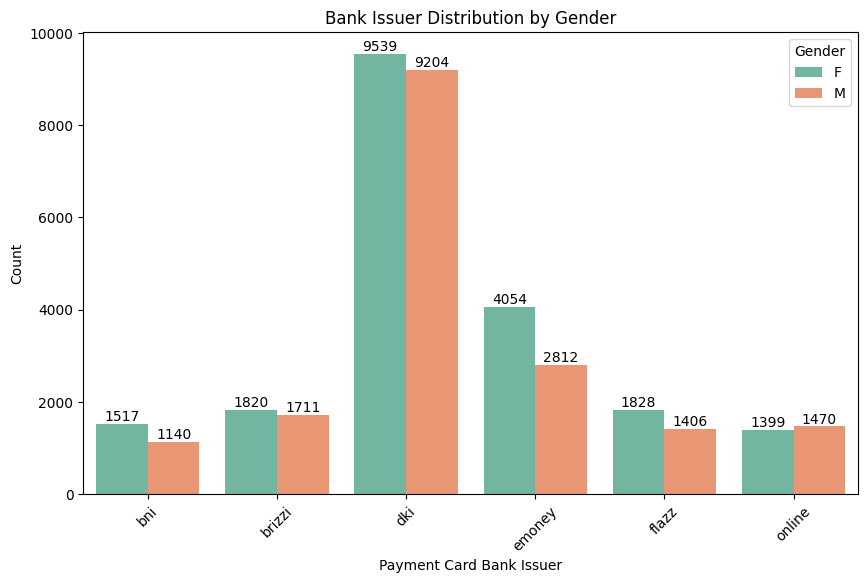

In [19]:
# Group the data by 'payCardBank' and 'payCardSex' and calculate the count
grouped_data = df.groupby(['payCardBank', 'payCardSex']).size().reset_index(name='count')
print(grouped_data)
# Create a grouped bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='payCardBank', y='count', hue='payCardSex', data=grouped_data, palette='Set2')
plt.title('Bank Issuer Distribution by Gender')
plt.xlabel('Payment Card Bank Issuer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')

# Add count annotations to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


**Insight**:
- The "dki" payment card issuer has the highest overall usage, with significant usage by both males (9,539) and females (9,204).
- "emoney" is also widely used, with higher usage by males (4,054) compared to females (2,812).
- "brizzi," "flazz," and "online" have somewhat similar usage patterns among both genders.
- "bni" is used by more males (1,517) than females (1,140).



**Statistical Testing:**

You can perform statistical tests to compare "payAmount" across different payment card issuers. For example, you can use a t-test or ANOVA.
Based on your tests, assess whether there are statistically significant differences in payment amounts among card issuers.

### **ANOVA - Test**

- Ho: There are no statistically significant differences in ridership or revenue among different card issuers.
- Ha: There are statistically significant differences in ridership or revenue among different card issuers.

In [20]:
import scipy.stats as stats
import pandas as pd

# Group the data by payment card issuer and select the payAmount column
grouped_data = df.groupby('payCardBank')['payAmount'].apply(list)

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)

alpha = 0.05  # Set the significance level

if p_value < alpha:
    print(f"P-value: {p_value:.4f}")
    print("There are statistically significant differences in payAmount among different payment card issuers.")
else:
    print(f"P-value: {p_value:.4f}")
    print("There are no statistically significant differences in payAmount among different payment card issuers.")


P-value: 0.0000
There are statistically significant differences in payAmount among different payment card issuers.


**Insight:**

The obtained p-value of 0.0000 provides strong statistical evidence to reject the null hypothesis (H0). This suggests that there is a significant difference in the average payment amount among passengers using different payment card issuers. In other words, there are statistically significant variations in payment amounts associated with various payment card issuers.






## **Conclusion & Recommendation**

From the analysis conducted, we can draw the following conclusions about the impact of Payment Card Issuers on Ridership and Revenue:

**1. Frequency of Payment Card Issusers:**
- The "dki" payment card seems to be the most popular choice, with around 18,743 transactions.
- Other cards like "emoney," "brizzi," "flazz," "online," and "bni" are also used, but not as frequently.

**2. Usage Patterns:**
- "dki" stands out as the most common payment card issuer, implying that it's probably widely accepted or favored by passengers.
- "emoney" also shows a substantial number of transactions, indicating its popularity among users.
- On the other hand, "brizzi," "flazz," "online," and "bni" have fewer transactions, which might be attributed to factors like limited acceptance or less widespread use.

**3. ANOVA TEST:**
 - The statistically significant result implies that there are variations in fare amounts among the payment card issuers. In other words, passengers using different card issuers tend to pay different average fares for their trips.

**Recommednation**
1. Further analysis can delve into passenger behavior and preferences associated with each card issuer. This may include analyzing the types of trips, demographics of passengers, and other factors influencing fare amounts.

2. It's crucial to keep an eye on how fares are changing and regularly check if businesses pricing and marketing strategies are working well.

3. Explore opportunities to expand Transjakarta routes or stops based on popular tap-in and tap-out locations. This can help capture more riders and revenue.

4. Collaborations: Partner with local businesses or institutions to offer joint promotions or discounts. This can encourage more people to choose Transjakarta for their daily commute.

5. 
    - Payment Card Promotion: Given that the "dki" card is widely used, consider running promotions or incentives to encourage even more passengers to use this card. This could include discounts, loyalty programs, or partnerships with the "dki" card issuer.

    - Market Emoney: "emoney" also shows a significant number of transactions. Explore opportunities to partner with the issuer of "emoney" to promote its use further. This might include special offers or integrations with popular mobile apps.

    - Improve Acceptance: For less frequently used cards like "brizzi," "flazz," "online," and "bni," assess and work on increasing acceptance across the Transjakarta network. The more cards passengers can use, the more convenient the system becomes.